___
<a href='http://www.kgptalkie.com'><img src='kgptalkie_strips.png'/></a>
___

<center><em>Copyright by KGPTalkie</em></center>
<center><em>For free ML tutorials, visit us at <a href='http://www.kgptalkie.com'>www.kgptalkie.com</a></em></center>

# Comprehensive Data Analysis with Pandas

- Today, Python is considered as the most popular programming language for doing data science work. The reason behind this popularity is that Python provides great packages for doing data analysis and visualization work.
- It provides tools for reading and writing data from a wide variety of sources such as CSV files, excel files, databases such as SQL, JSON files.
- It can perform variety of operations on datasets. It includes subsetting, slicing, filtering, merging, joining, groupby, reordering and reshaping operations.
- It can deal with missing data by either deleting them or filling them with zeros or a suitable test statistic.




There are three main data structures in Pandas. They are:-
- Series #one-dimensional array
- Dataframe #2d
- Panel #3D


In [257]:
import pandas as pd

In [12]:
flavors = ['mango', 'cherry', 'chocolate']
pd.Series(flavors)

pd.Series([1,2,3,4])

pd.Series([1,2,3,4.0])

s = pd.Series([1,2,3,'four','five','six', True, False])
type(s[4]),s.dtype
s

0        1
1        2
2        3
3     four
4     five
5      six
6     True
7    False
dtype: object

In [22]:
a = {'b':2, 'c':3, 'a': 1}
pd.Series(a)

s = pd.Series(a, index=['a','b','c'])
s.max(), s.min(), s.std(), s.var(), s.mean(), s.median(), s.count()

(3, 1, 1.0, 1.0, 2.0, 2.0, 3)

In [27]:
s = pd.Series([1,2,3,'four','five','six', True, False])
s.count(), s.ndim, s.shape

(8, 1, (8,))

#### Read files as Pandas Series

In [39]:
s = pd.read_csv('data/pokemon.csv', usecols=['Pokemon']).squeeze()
type(s)

s = pd.read_csv('data/foods.csv', usecols=['City']).squeeze()
type(s), s

(pandas.core.series.Series,
 0          Stamford
 1          Stamford
 2          New York
 3      Philadelphia
 4      Philadelphia
            ...     
 995        New York
 996    Philadelphia
 997        Stamford
 998        New York
 999        New York
 Name: City, Length: 1000, dtype: object)

#### Apply pythons built in functions to series

In [52]:
len(s), s.dtype, s.shape, s.size, s.ndim, s.index
# s.values

(1000, dtype('O'), (1000,), 1000, 1, RangeIndex(start=0, stop=1000, step=1))

In [50]:
import numpy as np
# np.arange(0,1000)

In [64]:
s = pd.read_csv('data/fortune1000.csv', usecols=['Revenue']).squeeze()
s.sum(), s.mean(), s.median(), s.std(), s.count(), s.min(), s.max()

(13535525, 13535.525, 5113.0, 28820.519134890506, 1000, 1895, 482130)

In [72]:
s.sort_values(ascending=False)
sorted(s)
list(s)
dict(s)
print()

#### .apply() for Pandas Series

In [79]:
s.apply(type)

s = pd.read_csv('data/fortune1000.csv', usecols=['Company']).squeeze()

In [80]:
s.head()

0               Walmart
1           Exxon Mobil
2                 Apple
3    Berkshire Hathaway
4              McKesson
Name: Company, dtype: object

In [92]:
s.apply(lambda x: x.split())
s.apply(str.title)
s.apply(str.split)

'string'.lower(), len('string')

('string', 6)

## DataFrame 

In [93]:
import pandas as pd

In [97]:
a = {'one': 1, 'two': 2, 'three': 3}
df = pd.DataFrame([a]).T
type(df)

pandas.core.frame.DataFrame

In [110]:
a = ['one', 'two', 'three']
pd.DataFrame(a, columns=['numbers'])

,numbers
0,one
1,two
2,three


In [120]:
a = [['one', 1], ['two', 2], ['three', 3]]
df = pd.DataFrame(a, columns=['string', 'numbers'])
df

,string,numbers
0,one,1
1,two,2
2,three,3


In [121]:
a = (('one', 1), ('two', 2), ('three', 3))
df = pd.DataFrame(a, columns=['string', 'numbers'])
df

,string,numbers
0,one,1
1,two,2
2,three,3


#### Read Files as DataFrame

In [123]:
df = pd.read_csv('data/nba.csv')
df.shape

(458, 9)

In [126]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

In [144]:
df.head()
df.tail()

df.head(2)
df.tail(2)

df.sample(3)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
120,Nick Young,Los Angeles Lakers,0.0,SF,31.0,6-7,210.0,USC,5219169.0
189,Tobias Harris,Detroit Pistons,34.0,SF,23.0,6-9,235.0,Tennessee,16000000.0
127,Brandon Knight,Phoenix Suns,3.0,PG,24.0,6-3,189.0,Kentucky,13500000.0


In [149]:
df.shape, df.ndim, len(df), df.dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [150]:
df.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


#### Columns Manipulation 

In [152]:
nba = pd.read_csv('data/nba.csv')
nba.shape, nba.ndim

((458, 9), 2)

In [153]:
nba.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

In [161]:
nba['Name'], type(nba['Name'])
nba['Number'].max()
nba['Number'].median()
type(nba['Number'])
nba['Number'].dtype

dtype('float64')

In [166]:
nba.Name.dtype

dtype('O')

In [181]:
nba[['Team','Name']]
nba[['Name', 'Team']].head()

nba['Sport'] = 'Some Random Sports'

In [186]:
nba.drop(['Sport'], axis=1, inplace=True)
nba.head(2)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0


In [195]:
nba.insert(0, column='First Name', value=nba['Name'].str.split().str.get(0))

In [196]:
nba

,First Name,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J.,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...,...
453,Shelvin,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


#### Arithmetic Operations

In [207]:
nba['Age'] + 10
nba['Age']*10
nba['Age']//10
nba['Age']%10

nba['Age'].add(10)

nba['weight_number'] = nba['Weight'] + nba['Number']

In [209]:
nba.drop(['weight_number'], axis=1, inplace=True)

In [210]:
nba

,First Name,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J.,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...,...
453,Shelvin,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


#### NULL Values Handling 

In [217]:
# nba.info()

nba.isnull().sum()

nba.notnull().sum()
nba.fillna(0, inplace=True)
nba.isnull().sum()

First Name    0
Name          0
Team          0
Number        0
Position      0
Age           0
Height        0
Weight        0
College       0
Salary        0
dtype: int64

In [225]:
nba = pd.read_csv('data/nba.csv')
nba.isnull().sum()

nba['College'] = nba['College'].fillna('Not a College/Unknown')
nba['College'].fillna('Not a College/Unknown', inplace=True)

In [227]:
nba.fillna(0, inplace=True)

In [228]:
nba

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,0.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,Not a College/Unknown,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,Not a College/Unknown,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,Not a College/Unknown,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


#### DataFrame Data Filtering

In [256]:
nba[nba['College']=='Duke']

nba[nba['Name'].str.contains('John')==True]

nba[nba['Age']>35].shape

nba[(nba['Age']>=30) & (nba['Age']<=35)]

nba[(nba['Age']>=30) & (nba['College']=='Duke') & (nba['Weight']<=200)]

nba[(nba['Age']>=30) & (nba['College']!='Duke') & (nba['Weight']<=200)]

nba[((nba['Age']>=30) & (nba['College']!='Duke')) | (nba['Weight']<=200)]

nba[nba['Age'].between(25, 31)]

nba[(nba['Age'].between(20, 25)==True) | (nba['Age'].between(35, 40)==True)].sample(10)

nba[nba['Age'].between(25, 31, inclusive='both')]


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,0.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,Not a College/Unknown,5000000.0
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,6-9,240.0,Not a College/Unknown,12000000.0
...,...,...,...,...,...,...,...,...,...
450,Joe Ingles,Utah Jazz,2.0,SF,28.0,6-8,226.0,Not a College/Unknown,2050000.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,206.0,Dayton,981348.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,Not a College/Unknown,2900000.0


#### Handling Unique and Duplicated Values 

In [263]:
nba.duplicated().sum()

df = pd.concat([nba, nba])
df.shape, nba.shape

df.duplicated().sum()

458

In [266]:
temp = nba.sample(5)
df = pd.concat([nba, temp])

df.duplicated().sum()

5

In [277]:
df.shape
df[~df.duplicated()]

df.drop_duplicates(inplace=True)
df.shape

(458, 9)

In [287]:
nba['College'].duplicated().sum()

nba[['Team', 'College']].duplicated().sum()

94

In [294]:
nba[['Team', 'College']].value_counts()
nba[['Team']].value_counts()

nba['Team'].value_counts()

len(nba['Team'].unique())

31

#### Retrive rows by index label

In [303]:
nba.iloc[[10]]
nba.iloc[[0,1,2,3,10,12,14]]

nba.loc[[0]]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0


In [305]:
nba.set_index('Name', inplace=True)

In [313]:
nba.iloc[0] #Avery Bradley

nba.loc['Avery Bradley']

Team        Boston Celtics
Number                 0.0
Position                PG
Age                   25.0
Height                 6-2
Weight               180.0
College              Texas
Salary           7730337.0
Name: Avery Bradley, dtype: object

In [317]:
'Avery Bradley' in nba.index

True

In [319]:
nba.reset_index(inplace=True)

In [321]:
# nba

#### Replace Cell Values

In [341]:
nba['Team'] = nba['Team'].replace('Boston Celtics', 'Boston C.')
nba['Name'].replace(['Avery Bradley', 'Jae Crowder'], 'Other Name')

nba['Team'] = nba['Team'].replace({'Boston C.':'Boston Celtics', 'Utah Jazz':'UJ'})

mask = nba['Team']=='Boston Celtics'
nba.loc[mask, 'Team'] = 'Boston C.'

#### Rename, Delete Index and Columns

In [344]:
nba.set_index('Name', inplace=True)

In [351]:
nba = nba.rename(index={'Avery Bradley': 'AB', 'Jae Crowder': 'JC'}, columns={'Team': 'Team Name'})

In [357]:
nba.drop(['AB', 'JC'])
# nba.drop(['Team Name', 'Number'], axis=1, inplace=True)

nba = nba.rename(index={'AB':'Avery Bradley', 'JC':'Jae Crowder'}, columns={'Team Name': 'Team'})


In [359]:
nba.reset_index(inplace=True)

In [367]:
nba.drop(0, inplace=True)

#### Lambda Apply 

In [383]:
nba['Name'] = nba['Name'].astype(str)
nba['Name'].apply(len)
nba['Name'].apply(lambda x: len(x))

def make_double(x):
    if type(x)==str:
        x = x + " " + x
        
    if type(x)==int:
        x = x*2
        
    return x

nba['Name'].apply(lambda x: make_double(x))

nba.apply(lambda x: make_double(x['Salary']), axis=1)


def combine(x, y):
    return x + " " + str(y)

nba.apply(lambda x: combine(x['Name'], x['Team']), axis=1)

1        Jae Crowder Boston C.
2       John Holland Boston C.
3        R.J. Hunter Boston C.
4      Jonas Jerebko Boston C.
5       Amir Johnson Boston C.
                ...           
453            Shelvin Mack UJ
454               Raul Neto UJ
455            Tibor Pleiss UJ
456             Jeff Withey UJ
457                        0 0
Length: 457, dtype: object

#### Groupby

In [406]:
# nba.info()
nba.describe()

nba.groupby('Team').mean()
nba.groupby('Team').mean().sort_values('Salary', ascending=False)

nba.groupby('Team').agg({'Salary': ['mean', 'max', 'min']})

nba.groupby('Team').groups.keys()

nba.groupby('Team').get_group('Boston C.')

print()

#### Groupby Multiple Columns 

In [419]:
nba.groupby(['Team', 'College']).groups.keys()

nba.groupby(['Team', 'College']).mean()

nba.groupby(['Team', 'College']).agg({'Age': ['mean', 'var', 'max', 'min']})

nba.groupby(['Team', 'College']).mean().sort_values(['Age', 'Weight'], ascending=True)
nba.groupby(['Team', 'College']).mean().sort_values(['Age', 'Weight'], ascending=[True, False])

,,Number,Age,Weight,Salary
Team,College,,,,
0,Not a College/Unknown,0.0,0.0,0.0,0.0
Milwaukee Bucks,UNLV,20.0,19.0,202.0,1733040.0
Detroit Pistons,Arizona,3.0,20.0,245.0,2841960.0
Indiana Pacers,Texas,33.0,20.0,243.0,2357760.0
Portland Trail Blazers,Indiana,21.0,20.0,240.0,2637720.0
...,...,...,...,...,...
Memphis Grizzlies,Blinn College,7.0,37.0,245.0,5000000.0
Houston Rockets,Arizona,31.0,38.0,185.0,947276.0
Los Angeles Clippers,Not a College/Unknown,9.0,39.0,185.0,947726.0


#### Merging, Joining, and Concatenation 

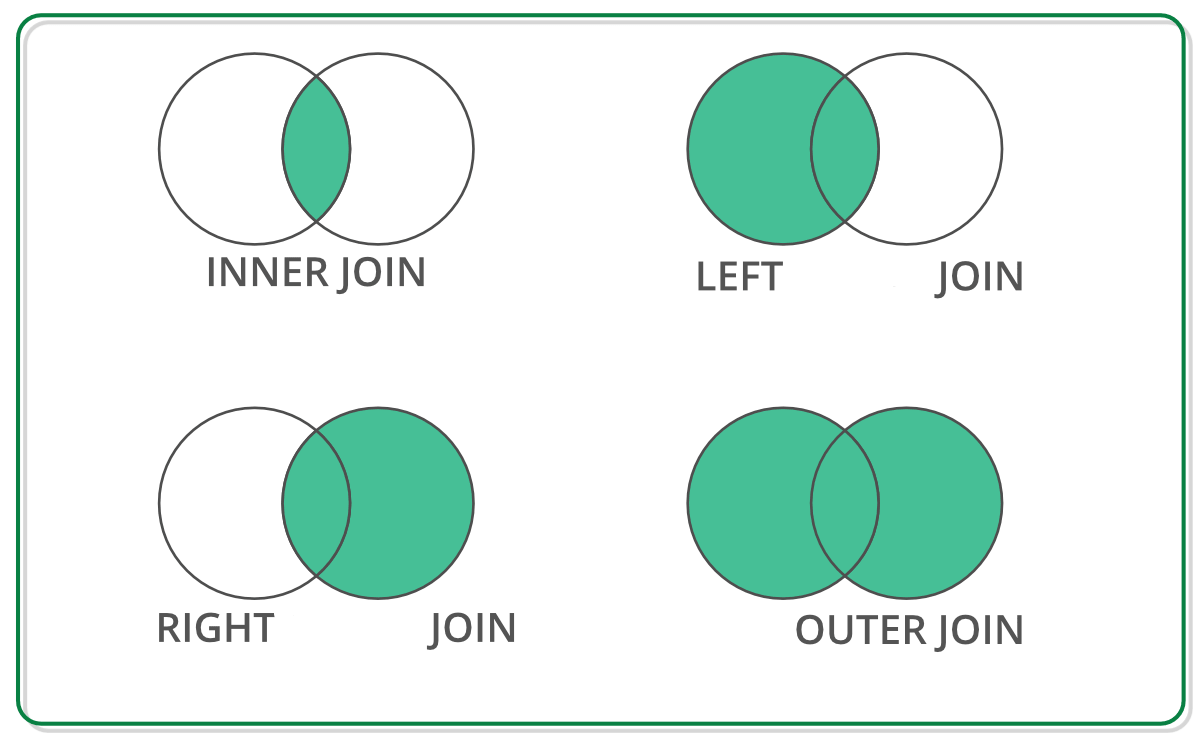

In [439]:
week1 = pd.read_csv('data/Restaurant - Week 1 Sales.csv')
week2 = pd.read_csv('data/Restaurant - Week 2 Sales.csv')

customers = pd.read_csv('data/Restaurant - Customers.csv')
foods = pd.read_csv('data/Restaurant - Foods.csv')

In [442]:
print('week1', week1.columns)
print('week2', week2.columns)
print('customers', customers.columns)
print('foods', foods.columns)


week1 Index(['Customer ID', 'Food ID'], dtype='object')
week2 Index(['Customer ID', 'Food ID'], dtype='object')
customers Index(['ID', 'First Name', 'Last Name', 'Gender', 'Company', 'Occupation'], dtype='object')
foods Index(['Food ID', 'Food Item', 'Price'], dtype='object')


In [447]:
week = pd.concat([week1, week2], ignore_index=True)

In [450]:
week_ = pd.concat([week1, week2], ignore_index=True, axis=1)

In [465]:
week1.merge(week2) # common cust and food
week1.merge(week2, on='Customer ID', suffixes=['-Week1', '-Week2'])

week1.merge(week2, on=['Customer ID', 'Food ID'], how='outer')


cust_week = week.merge(customers, how='left', left_on='Customer ID', right_on='ID').drop('ID', axis=1)

cust_week.merge(foods, how='left', left_on = 'Food ID', right_on='Food ID')


week1.join(customers.set_index('ID'), on = 'Customer ID')

,Customer ID,Food ID,First Name,Last Name,Gender,Company,Occupation
0,537,9,Cheryl,Carroll,Female,Zoombeat,Registered Nurse
1,97,4,Amanda,Watkins,Female,Ozu,Account Coordinator
2,658,1,Patrick,Webb,Male,Browsebug,Community Outreach Specialist
3,202,2,Louis,Campbell,Male,Rhynoodle,Account Representative III
4,155,9,Carolyn,Diaz,Female,Gigazoom,Database Administrator III
...,...,...,...,...,...,...,...
245,413,9,Diane,Bailey,Female,Wikibox,Technical Writer
246,926,6,Anne,Wagner,Female,Skyba,Legal Assistant
247,134,3,Diana,Hall,Female,Quinu,Financial Advisor
248,396,6,Juan,Romero,Male,Zoonder,Analyst Programmer


#### Working with Datetime 

In [466]:
import datetime as dt

In [475]:
someday = dt.date(2019, 10, 21) #YYYY-MM-DD
someday.year, someday.month, someday.day

str(someday)

'2019-10-21'

In [480]:
someday = pd.to_datetime('2019-10-21') #YYYY-MM-DD
someday.year,someday.month, someday.day

pd.Timestamp('2019-10-21 01:13:21')

Timestamp('2019-10-21 01:13:21')

In [481]:
dates = ['2023-10-01', '2023-10-02', '2023-10-03']
pd.to_datetime(dates)

DatetimeIndex(['2023-10-01', '2023-10-02', '2023-10-03'], dtype='datetime64[ns]', freq=None)

In [487]:
dates = ['2023-10-01', '2023-10-02', '2023-10-03', 'fasdfwrt']
pd.to_datetime(dates, errors='coerce')

DatetimeIndex(['2023-10-01', '2023-10-02', '2023-10-03', 'NaT'], dtype='datetime64[ns]', freq=None)

In [491]:
pd.date_range('2023-10-01', '2023-11-20', freq='M')

DatetimeIndex(['2023-10-31'], dtype='datetime64[ns]', freq='M')

In [496]:
pd.date_range('2023-11-20', periods=10, freq='M')

DatetimeIndex(['2023-11-30', '2023-12-31', '2024-01-31', '2024-02-29',
               '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30',
               '2024-07-31', '2024-08-31'],
              dtype='datetime64[ns]', freq='M')

#### Read Stock Data from `YAHOO` Finance 

In [498]:
# !pip install pandas_datareader

In [499]:
import pandas_datareader.data as web

In [501]:
start = pd.to_datetime('2022-10-01')
end = pd.to_datetime('2022-10-31')

data = web.DataReader('TSLA', 'yahoo', start, end)

In [503]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000
mean,231.869548,219.526819,226.036363,225.694092,8.195408e+07,225.694092
std,15.408505,15.396451,16.636756,14.120963,1.584364e+07,14.120963
min,213.500000,198.589996,205.820007,204.990005,6.155430e+07,204.990005
25%,222.944996,209.587498,211.407505,217.767506,6.823185e+07,217.767506
50%,227.925003,217.514999,223.969994,222.690002,7.822100e+07,222.690002
75%,234.380005,222.642506,232.897503,228.275002,9.346412e+07,228.275002
max,275.570007,262.470001,266.149994,265.250000,1.177981e+08,265.250000


# Other Resources
|  ML Course | Description |
|:---|:---|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |
